# Import of packages

In [20]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
import numpy as np
from math import pi
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Setting the number of layers and initializing quantum circuit

In [23]:
layers = int(input("Type number of layers: "))
num_positions = layers + 1
pos_qubits = (num_positions - 1).bit_length()

# Quantum and Classical Registers
qr_coin = QuantumRegister(1, 'coin')
qr_pos = QuantumRegister(pos_qubits, 'pos')
cr_pos = ClassicalRegister(pos_qubits, 'c')
qc = QuantumCircuit(qr_coin, qr_pos, cr_pos)

Type number of layers: 30


# Main Algorithm

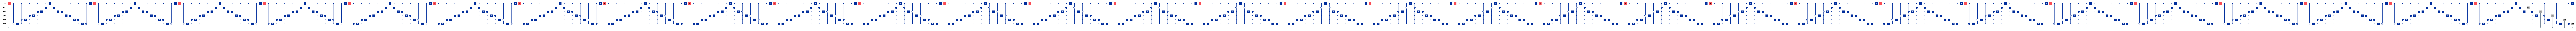

In [24]:
#Main Algorithm for Hadamard Quantum Walk Distribution
for step in range(layers):

     # Flip the coin
     qc.h(qr_coin)

     # Addition Operator
     for i in reversed(range(len(qr_pos))):
        controls = [qr_pos[v] for v in range(len(qr_pos) - 1, i, -1)]
        controls.append(qr_coin)
        qc.mcx(controls, qr_pos[i])
        if i != 0:
            qc.x(qr_pos[i])

    # Switch the coin
     qc.x(qr_coin)

     # Subtraction Operator
     for i in range(len(qr_pos)):
        if i != 0:
            qc.x(qr_pos[i])
        controls = [qr_pos[v] for v in range(len(qr_pos) - 1, i, -1)]
        controls.append(qr_coin)
        qc.mcx(controls, qr_pos[i])

    # Switch the coin
     qc.x(qr_coin)

# Measure the position register
qc.measure(qr_pos, cr_pos)
#Draw the quantum circuit
qc.draw(output = 'mpl', fold = -1)

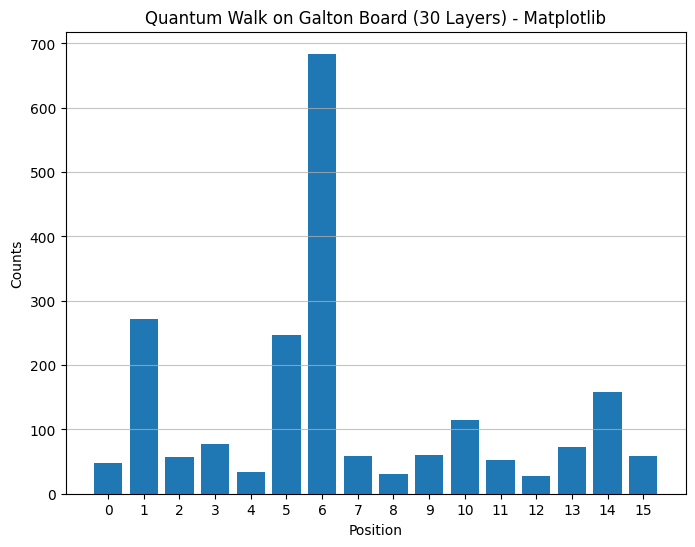

In [25]:
# Simulate
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=2048)
result = job.result()
counts = result.get_counts()


# Plot the result
positions = [int(pos, 2) for pos in counts.keys()]
counts_values = list(counts.values())

# Sort the positions and counts based on the position
sorted_indices = sorted(range(len(positions)), key=lambda k: positions[k])
sorted_positions = [positions[i] for i in sorted_indices]
sorted_counts = [counts_values[i] for i in sorted_indices]

# Plot using Matplotlib
plt.figure(figsize=(8, 6)) # Optional: adjust figure size
plt.bar(sorted_positions, sorted_counts)
plt.xlabel("Position")
plt.ylabel("Counts")
plt.title(f"Quantum Walk on Galton Board ({layers} Layers) - Matplotlib")
plt.xticks(sorted_positions) # Ensure all positions are labeled on the x-axis
plt.grid(axis='y', alpha=0.75) # Optional: add a grid
plt.show()

# Explanation of the histogram
The distribution is skewed to a certain region of positions due to repeated Hadamard gates in the algorithm. The bias is introduced because of the starting position of a coin (whether it is in the state |0> or |1>).